# Assignment: Trees

## Do two questions in total: "Q1+Q2" or "Q1+Q3"

`! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Please answer the following questions in your own words.
1. Why is the Gini a good loss function for categorical target variables?
2. Why do trees tend to overfit, and how can this tendency be constrained?
3. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.
4. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
5. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

Q1.1:
The Gini index is good for categorial targets becuase it mmeasures how pure or hoogenous a node is after a split. It tells us how mixed the classes are, lower Gini mmeans the node mostly mostly contains one class, whih is ideal for classifiation. It's also simple to opute and differentatues well between nodes with different lass proportions which helps the algorith find effetie splits.

Q1.2:
Trees tend to overfit because they keep splitting the data until they almost perfetly fit the training set, even capturing random noise This makes the less accurate on new unseen data To control this, we an set limits like the max depth of the tree the minimumm nuber of samples per leaf, or prune the tree after its built. Using ensemble methods like random forests also helps reduce overfitting


Q1.3:
False, trees perfor well with both categorial and continuous variables They're flexible because they can split continuous features into interals just as easily as they an handle categorial ones. Their strength comes from capturing non linear relationships and interation between variables not just from dealing with categorial data.

Q1.4:
Most trees use binary splits (two branches) beuase they simplify computation and interpretation. Binary splits make it easier to searh for the best cutoff point and to visualize the decision structure. Allowing more than two branches (multiway splits) can make the tree more comple harder to prune, and more likely to overfit.

Q1.5:

You can usually tell if a tree is oerfitting when its super deep, has tons of branches, and performs way better on the training data than on the test data. That means it learned too many small details from the training set. If the tree is really shallow and doesnt perfor well on either the training or test data then its probaly underfitting becuase it's too simple to capture the patterns.

**Q2.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [6]:
# Question 2.1
import pandas as pd

df = pd.read_csv('/content/Breast Cancer METABRIC.csv')

print(f"Observations: {df.shape[0]}")
print(f"Variables: {df.shape[1]}")

display(df.head())

Observations: 2509
Variables: 34


,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [7]:
# Question 2.2: Prepare features and covariates

numeric_features = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']
categorical_features = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']

X_numeric = df[numeric_features]

X_categorical = pd.get_dummies(df[categorical_features], dummy_na=False) # Excluding NaN as a category for now

X = pd.concat([X_numeric, X_categorical], axis=1)

print("Feature matrix X:")
display(X.head())

Feature matrix X:


,Tumor Size,Lymph nodes examined positive,Age at Diagnosis,Tumor Stage,Chemotherapy_No,Chemotherapy_Yes,Cancer Type Detailed_Breast,Cancer Type Detailed_Breast Angiosarcoma,Cancer Type Detailed_Breast Invasive Ductal Carcinoma,Cancer Type Detailed_Breast Invasive Lobular Carcinoma,Cancer Type Detailed_Breast Invasive Mixed Mucinous Carcinoma,Cancer Type Detailed_Breast Mixed Ductal and Lobular Carcinoma,Cancer Type Detailed_Invasive Breast Carcinoma,Cancer Type Detailed_Metaplastic Breast Cancer
0,22.0,10.0,75.65,2.0,True,False,False,False,True,False,False,False,False,False
1,10.0,0.0,43.19,1.0,True,False,False,False,True,False,False,False,False,False
2,15.0,1.0,48.87,2.0,False,True,False,False,True,False,False,False,False,False
3,25.0,3.0,47.68,2.0,False,True,False,False,False,False,False,True,False,False
4,40.0,8.0,76.97,2.0,False,True,False,False,False,False,False,True,False,False


Confusion Matrix:
[[941 203]
 [264 573]]

Accuracy: 0.7643

Dendrogram:


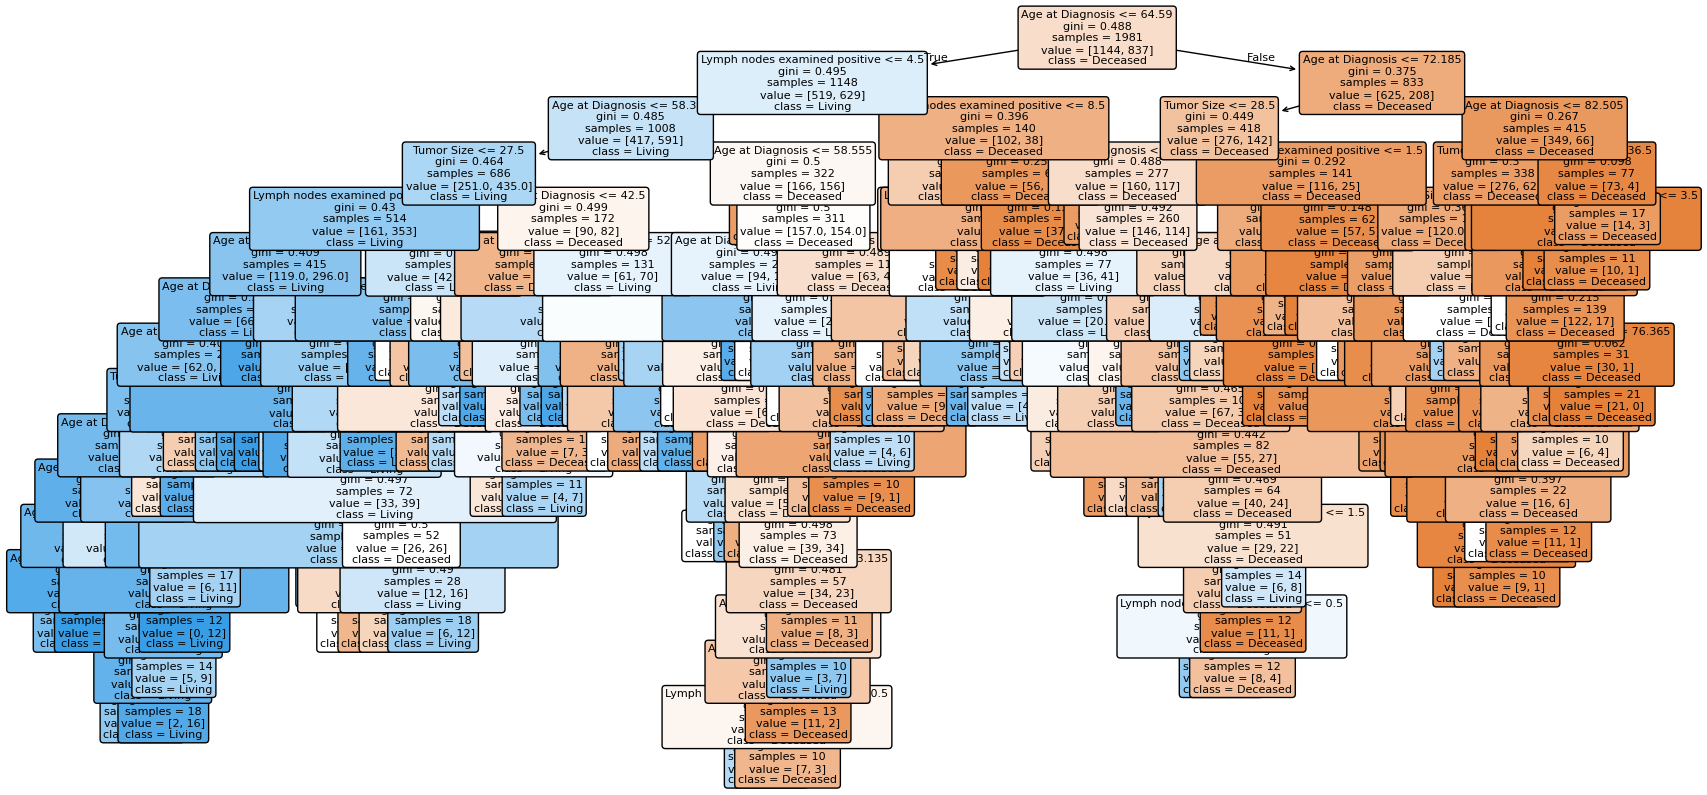

In [13]:
# Question 2.3: Predict Overall Survival Status

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

y = df['Overall Survival Status']

data = pd.concat([X, y], axis=1).dropna(subset=['Overall Survival Status'])

X_cleaned = data.drop('Overall Survival Status', axis=1)
y_cleaned = data['Overall Survival Status']

for col in X_cleaned.columns:
    if X_cleaned[col].dtype in ['int64', 'float64']:
        X_cleaned[col] = X_cleaned[col].fillna(X_cleaned[col].mean())
    else:
        # For categorical columns that might have NaNs introduced by one-hot encoding if original had NaNs
        # (though we used dummy_na=False), fill with a placeholder or mode if necessary.
        # Given dummy_na=False, NaNs in original categorical columns were already handled by get_dummies
        pass


# Initialize the Decision Tree Classifier
# Constrain the minimum samples per leaf to 10
tree_clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

tree_clf.fit(X_cleaned, y_cleaned)

y_pred = tree_clf.predict(X_cleaned)

print("Confusion Matrix:")
print(confusion_matrix(y_cleaned, y_pred))

accuracy = accuracy_score(y_cleaned, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nDendrogram:")
plt.figure(figsize=(20,10))
plot_tree(tree_clf, feature_names=X_cleaned.columns, class_names=tree_clf.classes_, filled=True, rounded=True, fontsize=8)
plt.show()

In [15]:
# Question 2.4: Compute True Positive Rate and True Negative Rate

tn, fp, fn, tp = confusion_matrix(y_cleaned, y_pred).ravel()

# Calculate True Positive Rate (Sensitivity)
tpr = tp / (tp + fn)

# Calculate True Negative Rate (Specificity)
tnr = tn / (tn + fp)

print(f"True Positive Rate (Sensitivity): {tpr:.4f}")
print(f"True Negative Rate (Specificity): {tnr:.4f}")

print("\nComparison:")
if tpr > tnr:
    print("The model tends to perform better with respect to True Positive Rate (Sensitivity).")
elif tnr > tpr:
    print("The model tends to perform better with respect to True Negative Rate (Specificity).")
else:
    print("The model performs equally well with respect to both True Positive Rate and True Negative Rate.")

True Positive Rate (Sensitivity): 0.6846
True Negative Rate (Specificity): 0.8226

Comparison:
The model tends to perform better with respect to True Negative Rate (Specificity).


Optimal min_samples_leaf: 130
R^2 with optimal min_samples_leaf: 0.1299

Plot of Actual vs. Predicted Overall Survival (Months) on Test Set:


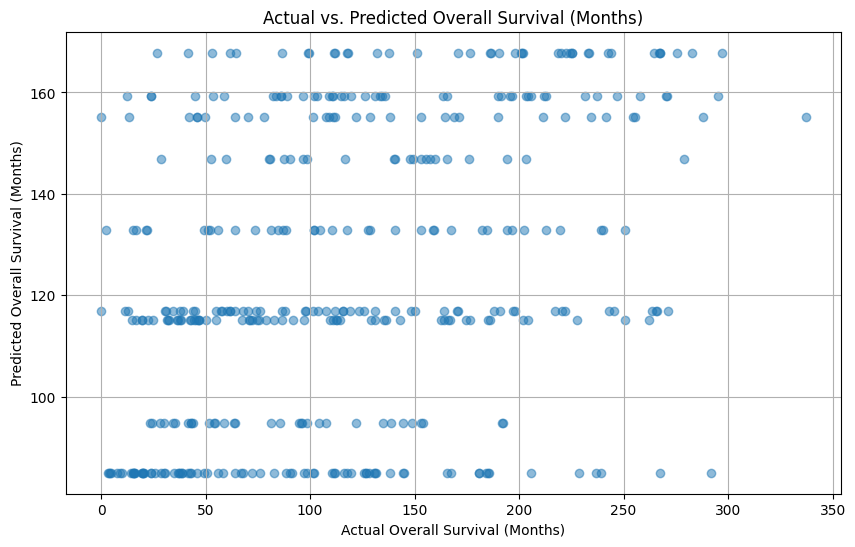


Assessment for Clinical Purposes:
The R^2 value indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.
An R^2 of 0.1299 suggests that 12.99% of the variance in Overall Survival (Months) can be explained by this model.
For clinical purposes, an R^2 value of this magnitude might be considered low, indicating that the model's predictions may not be sufficiently accurate for individual patient prognoses.
Clinical decisions often require high levels of certainty and precision. While this model might identify some general trends, its predictive power for individual outcomes appears limited.
Further investigation, potentially with more sophisticated models, additional relevant features, or larger datasets, would likely be necessary to develop a model suitable for clinical use.


In [20]:
# Question 2.5: Predict Overall Survival (Months)

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

y_regression = df['Overall Survival (Months)']

data_regression = pd.concat([X, y_regression], axis=1).dropna(subset=['Overall Survival (Months)'])

X_cleaned_regression = data_regression.drop('Overall Survival (Months)', axis=1)
y_cleaned_regression = data_regression['Overall Survival (Months)']

for col in X_cleaned_regression.columns:
    if X_cleaned_regression[col].dtype in ['int64', 'float64']:
        X_cleaned_regression[col] = X_cleaned_regression[col].fillna(X_cleaned_regression[col].mean())
    else:
        pass

X_train, X_test, y_train, y_test = train_test_split(X_cleaned_regression, y_cleaned_regression, test_size=0.2, random_state=42)

min_samples_leaf_values = range(10, 200, 10)
r2_scores = []
for min_samples in min_samples_leaf_values:
    tree_reg = DecisionTreeRegressor(min_samples_leaf=min_samples, random_state=42)
    tree_reg.fit(X_train, y_train)
    y_test_pred = tree_reg.predict(X_test)
    r2 = r2_score(y_test, y_test_pred)
    r2_scores.append(r2)

optimal_min_samples_leaf = min_samples_leaf_values[np.argmax(r2_scores)]
print(f"Optimal min_samples_leaf: {optimal_min_samples_leaf}")

optimal_tree_reg = DecisionTreeRegressor(min_samples_leaf=optimal_min_samples_leaf, random_state=42)
optimal_tree_reg.fit(X_train, y_train)
y_test_pred_optimal = optimal_tree_reg.predict(X_test)

r2_optimal = r2_score(y_test, y_test_pred_optimal)
print(f"R^2 with optimal min_samples_leaf: {r2_optimal:.4f}")

print("\nPlot of Actual vs. Predicted Overall Survival (Months) on Test Set:")
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_optimal, alpha=0.5)
plt.xlabel("Actual Overall Survival (Months)")
plt.ylabel("Predicted Overall Survival (Months)")
plt.title("Actual vs. Predicted Overall Survival (Months)")
plt.grid(True)
plt.show()

print("\nAssessment for Clinical Purposes:")
print("The R^2 value indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.")
print(f"An R^2 of {r2_optimal:.4f} suggests that {r2_optimal*100:.2f}% of the variance in Overall Survival (Months) can be explained by this model.")
print("For clinical purposes, an R^2 value of this magnitude might be considered low, indicating that the model's predictions may not be sufficiently accurate for individual patient prognoses.")
print("Clinical decisions often require high levels of certainty and precision. While this model might identify some general trends, its predictive power for individual outcomes appears limited.")
print("Further investigation, potentially with more sophisticated models, additional relevant features, or larger datasets, would likely be necessary to develop a model suitable for clinical use.")

**Q3.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?